<h1 align="center">
  <a href="https://portkey.ai">
    <img width="300" src="https://analyticsindiamag.com/wp-content/uploads/2023/08/Logo-on-white-background.png" alt="portkey">
  </a>
</h1>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1pRqvJ1R25lPXwCBcAdj1kRb4nPcdzbgK?usp=sharing)



# Monitoring Autogen agents with Portkey

[**AutoGen**](https://github.com/microsoft/autogen) is a framework that enables the development of LLM applications using multiple agents that can converse with each other to solve tasks. AutoGen agents are customizable, conversable, and seamlessly allow human participation. They can operate in various modes that employ combinations of LLMs, human inputs, and tools

One of the major challenges of building AI agents is the lack of visibility into key performance metrics such as:

- **Number of API Requests**: How many requests are being made to LLMs.
- **Token Usage & Costs**: How many tokens are being consumed and the cost for each agent run.
- **Latency**: How long is the agent taking to complete a set of tasks.

<br>

**Portkey** is an open source [**AI Gateway**](https://github.com/Portkey-AI/gateway) that helps you manage access to 250+ LLMs through a unified API while providing visibility into

✅ cost  
✅ performance  
✅ accuracy metrics

This notebook demonstrates how you can bring visibility and flexbility to Autogen agents using Portkey's AI Gateway.

In [ ]:
!pip install -qU pyautogen portkey-ai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.6/284.6 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.3/86.3 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.5/325.5 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.6 MB/s eta 0:00:00


## Game Developer Assistant

In [ ]:
from autogen import AssistantAgent, UserProxyAgent, config_list_from_json
from google.colab import userdata

# Import the portkey library to fetch helper functions
from portkey_ai import PORTKEY_GATEWAY_URL, createHeaders

gpt3_config = [
    {
        "api_key": userdata.get("OPENAI_API_KEY"),
        "model": "gpt-3.5-turbo",
        "base_url": PORTKEY_GATEWAY_URL,
        "api_type": "openai",
        "default_headers": createHeaders(
            api_key = userdata.get("PORTKEY_API_KEY"),
            provider = "openai",
        )
    }
]


gpt4o_config = [
    {
        "api_key": userdata.get("OPENAI_API_KEY"),
        "model": "gpt-4o",
        "base_url": PORTKEY_GATEWAY_URL,
        "api_type": "openai",
        "default_headers": createHeaders(
            api_key = userdata.get("PORTKEY_API_KEY"),
            provider = "openai",
        )
    }
]

llama3_config = [
    {
        "api_key": userdata.get("GROQ_API_KEY"),
        "model": "llama3-70b-8192",
        "base_url": PORTKEY_GATEWAY_URL,
        "api_type": "openai", # Portkey conforms to the openai api_type
        "default_headers": createHeaders(
            api_key = userdata.get("PORTKEY_API_KEY"),
            provider = "groq",
        )
    }
]

In [ ]:
import autogen

# Create user proxy agent, coder, product manager
user_proxy = autogen.UserProxyAgent(
    name="User_proxy",
    system_message="A human admin who will give the idea and run the code provided by Coder.",
    code_execution_config={"last_n_messages": 2, "work_dir": "groupchat"},
    human_input_mode="ALWAYS",
)
coder = autogen.AssistantAgent(
    name="Coder",
    # system_message = "You are talented Python developer who is good at developing games. You closely work with Product Manager."
    llm_config={"config_list": llama3_config},
)
pm = autogen.AssistantAgent(
    name="product_manager",
    system_message="You will help break down the initial idea into a well scoped requirement for the coder; Do not involve in future conversations or error fixing",
    llm_config={"config_list": gpt3_config},
)

# Create groupchat
groupchat = autogen.GroupChat(
    agents=[user_proxy, coder, pm], messages=[])
manager = autogen.GroupChatManager(groupchat=groupchat, llm_config={"config_list": gpt4o_config})

# Start the conversation
user_proxy.initiate_chat(
    manager, message="Build a classic & basic pong game with 2 players in python")

User_proxy (to chat_manager):

Build a classic & basic pong game with 2 players in python

--------------------------------------------------------------------------------

Next speaker: product_manager

product_manager (to chat_manager):

Requirement:

1. The game should be a classic pong game with two players.
2. The game should be built using Python programming language.
3. The game should feature a ball that bounces between the players' paddles.
4. Each player controls a paddle using designated keys (e.g., player 1 uses 'W' and 'S' keys, player 2 uses 'Up' and 'Down' keys).
5. The paddles should move vertically to hit the ball and prevent it from going past them.
6. The game should have a scoring system where a player scores a point when the opponent fails to hit the ball.
7. The game should end when one player reaches a certain number of points or after a set amount of time.
8. The game should display the scores of both players during gameplay.
9. The game should have a simple gra

ChatResult(chat_id=None, chat_history=[{'content': 'Build a classic & basic pong game with 2 players in python', 'role': 'assistant'}, {'content': "Requirement:\n\n1. The game should be a classic pong game with two players.\n2. The game should be built using Python programming language.\n3. The game should feature a ball that bounces between the players' paddles.\n4. Each player controls a paddle using designated keys (e.g., player 1 uses 'W' and 'S' keys, player 2 uses 'Up' and 'Down' keys).\n5. The paddles should move vertically to hit the ball and prevent it from going past them.\n6. The game should have a scoring system where a player scores a point when the opponent fails to hit the ball.\n7. The game should end when one player reaches a certain number of points or after a set amount of time.\n8. The game should display the scores of both players during gameplay.\n9. The game should have a simple graphical interface to show the game elements such as paddles, ball, and score.", 'na

## Telemetry with Portkey

### Part 1: Logs

For the above agent run, we have initiated two agents utilizing the GPT-3.5, GPT-4o and Llama 3 models. The detailed logs for this request are available on the Portkey dashboard, providing comprehensive insights into the activities of each agent.

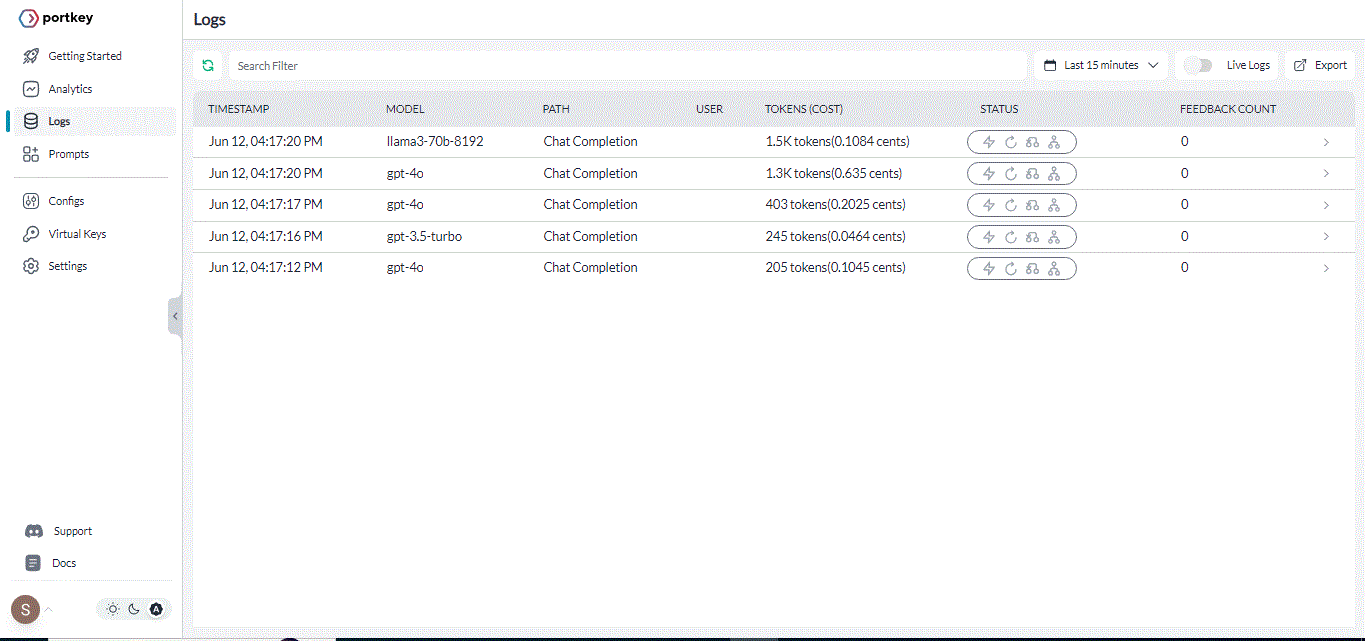

### Part 2: Overall Analytics

The insights from this request can be viewed on the Portkey dashboard. We are able to infer the following:

1. Total Tokens Used: ___ tokens
2. Total Number of Requests: __ requests; Llama 3 (__ requests), GPT-3.5 (__ requests), GPT-4o (_ requests)

You can also review many other metrics from the dashboards like cost, latency, etc.

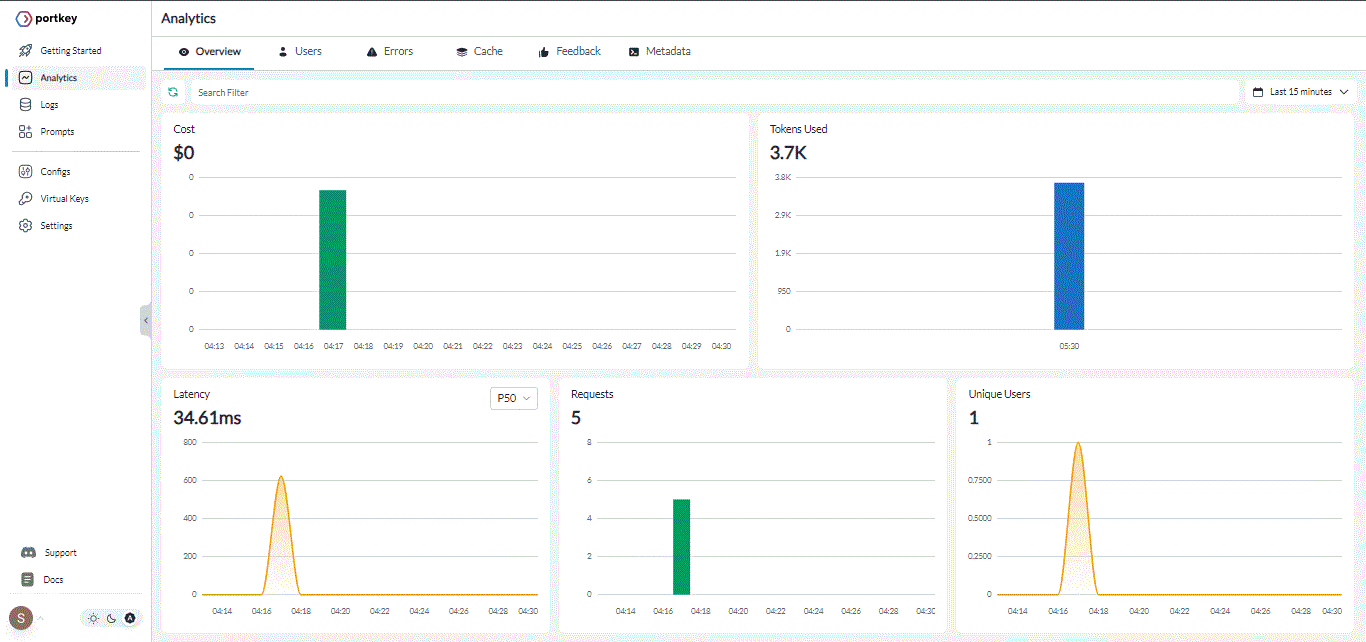